In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())



In [3]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_bite_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_bone_fear.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_Fear/OAF_book_fear.wav']

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
#creating a dataframe
df = pd.DataFrame()
df['Speech'] = paths
df['label'] = labels
df.head()

,Speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,fear
1,/content/drive/MyDrive/TESS Toronto emotional ...,fear
2,/content/drive/MyDrive/TESS Toronto emotional ...,fear
3,/content/drive/MyDrive/TESS Toronto emotional ...,fear
4,/content/drive/MyDrive/TESS Toronto emotional ...,fear


In [6]:
df['label'].value_counts()

fear       400
disgust    400
happy      400
sad        400
angry      400
ps         400
neutral    400
Name: label, dtype: int64

# **Exploratory Data Analysis (EDA)**

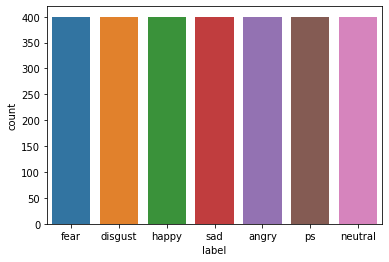

In [7]:
sns.countplot(df['label'])

In [8]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveplot(data, sr=sr)
  plt.show()

In [9]:
def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar()

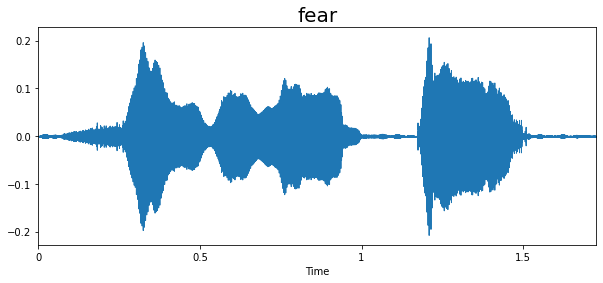

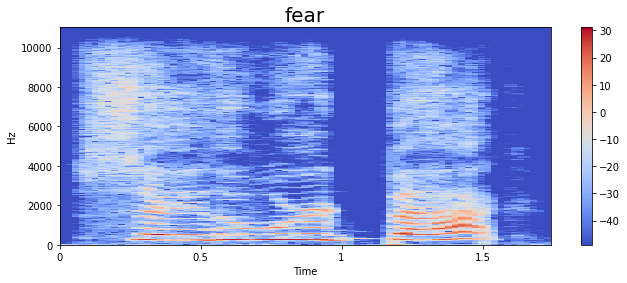

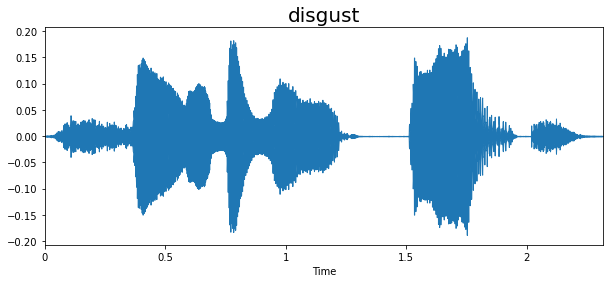

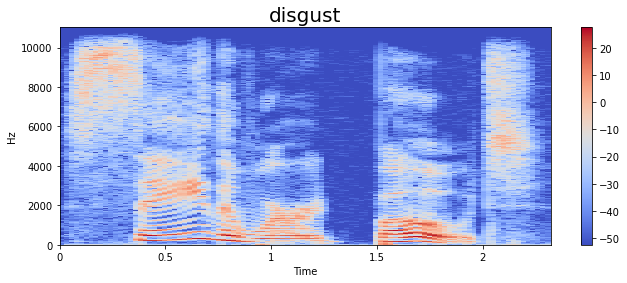

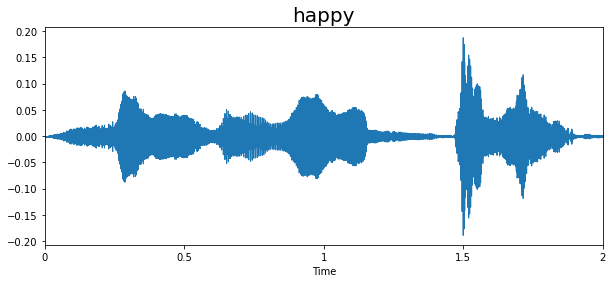

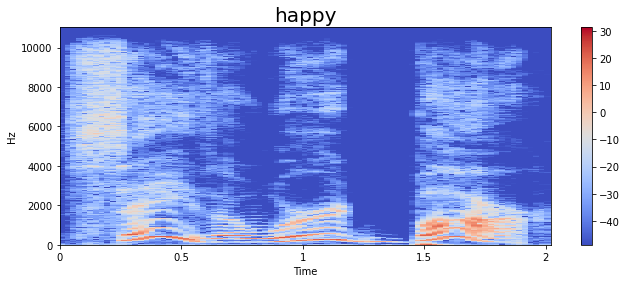

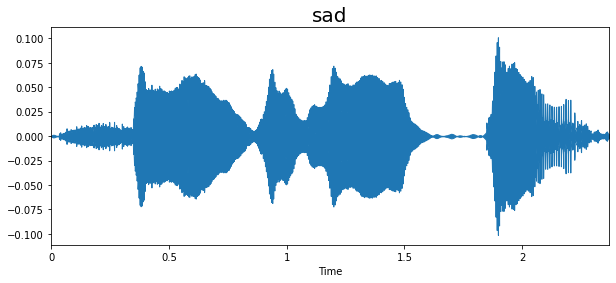

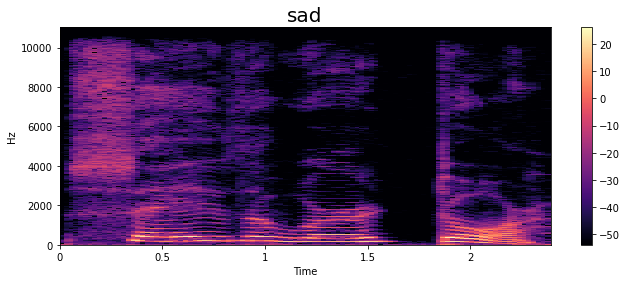

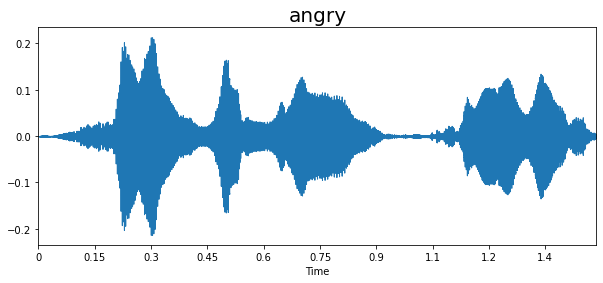

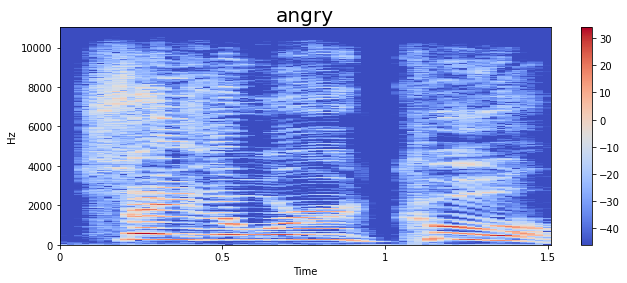

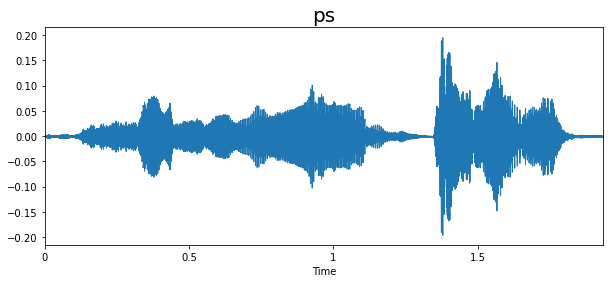

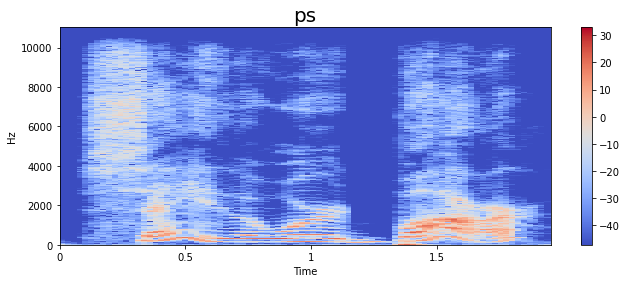

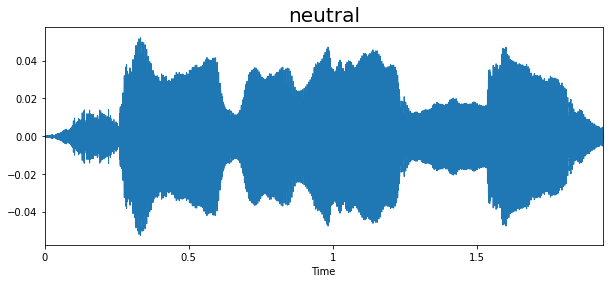

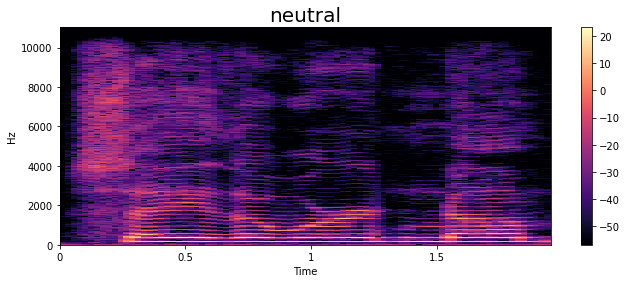

In [10]:
emotion = ['fear', 'disgust', 'happy', 'sad', 'angry', 'ps', 'neutral']
for i in emotion:
  path = np.array(df['Speech'][df['label']==i])[0]
  data, sampling_rate = librosa.load(path)
  waveplot(data, sampling_rate, i)
  print('\n')
  spectogram(data, sampling_rate, i)
  display(Audio(path))

## Feature Extraction

MFCC - Mel-frequency cepstral coefficients

In [11]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [12]:
extract_mfcc(df['Speech'][0])

array([-4.4875830e+02,  9.3322304e+01, -2.1426954e+00, -1.5552248e+01,
        1.0603163e+00,  6.4200325e+00, -1.5222017e+01,  2.2011573e+00,
       -1.2416106e+01,  4.8240499e+00, -1.4277562e+01, -5.1457038e+00,
       -8.2099867e+00, -1.0026728e+00, -4.2524981e+00,  3.7397485e+00,
       -9.0662355e+00,  3.8598497e+00,  2.1227150e+00, -6.2084298e+00,
        4.7061357e+00,  1.9748264e+01,  1.3726977e+01,  3.0568722e+01,
        2.0497396e+01,  1.8738918e+01,  6.8936110e+00,  3.8345251e+00,
       -3.1717875e+00,  6.6682067e+00, -2.4793753e-01,  2.6621575e+00,
       -3.0380268e+00, -4.3655815e+00,  5.5305135e-01,  3.2332935e+00,
       -3.0719731e+00, -1.3444185e+00, -2.1230979e+00,  1.9018476e+00],
      dtype=float32)

In [13]:
X_mfcc = df['Speech'].apply(lambda x : extract_mfcc(x))
X_mfcc

0       [-448.7583, 93.3223, -2.1426954, -15.552248, 1...
1       [-456.86343, 97.63094, 16.04151, -31.753325, -...
2       [-470.10178, 90.04231, 12.782275, -14.783963, ...
3       [-444.69482, 90.09379, 26.294909, -6.9984703, ...
4       [-496.33694, 96.55331, 23.757051, -14.341943, ...
                              ...                        
2795    [-324.95752, 34.96247, -13.4050665, 33.948322,...
2796    [-364.70844, 34.919556, -14.717556, 16.740282,...
2797    [-342.626, 65.27689, -19.461836, 17.458578, -6...
2798    [-369.77512, 31.979368, -21.821121, 32.13423, ...
2799    [-385.12747, 63.250263, -18.959455, 16.817873,...
Name: Speech, Length: 2800, dtype: object

In [14]:
X_mfcc.shape

(2800,)

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [16]:
# input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [17]:
df['label']

0        fear
1        fear
2        fear
3        fear
4        fear
        ...  
2795    happy
2796    happy
2797    happy
2798    happy
2799    happy
Name: label, Length: 2800, dtype: object

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(df['label']))
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y.shape

(2800, 7)

# Split Train, Validation and Test Data

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

In [21]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (2240, 40, 1)
X_test:  (560, 40, 1)
y_train:  (2240, 7)
y_test:  (560, 7)


## Create LSTM Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [23]:
model = Sequential([
    LSTM(128, return_sequences = False, input_shape = (40, 1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-traina

In [25]:
#Train the model
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 50, batch_size = 128)

Epoch 1/50
14/14 [==============================] - 7s 48ms/step - loss: 1.8080 - accuracy: 0.2885 - val_loss: 1.6215 - val_accuracy: 0.4397
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 1.4677 - accuracy: 0.4481 - val_loss: 1.2471 - val_accuracy: 0.5759
Epoch 3/50
14/14 [==============================] - 0s 10ms/step - loss: 1.0777 - accuracy: 0.6038 - val_loss: 0.7279 - val_accuracy: 0.7723
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.7356 - accuracy: 0.7210 - val_loss: 0.4935 - val_accuracy: 0.8438
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.5333 - accuracy: 0.8086 - val_loss: 0.3444 - val_accuracy: 0.8839
Epoch 6/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4090 - accuracy: 0.8672 - val_loss: 0.2287 - val_accuracy: 0.9263
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.3106 - accuracy: 0.9029 - val_loss: 0.2103 - val_accuracy: 0.9397
Epoch 8/50
14/14 

# Plot the Results

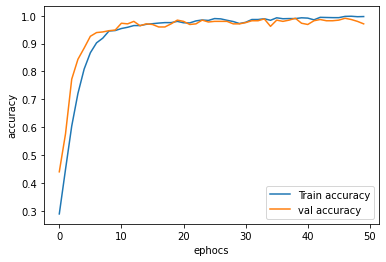

In [26]:
ephocs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(ephocs, acc, label = 'Train accuracy')
plt.plot(ephocs, val_acc, label = 'val accuracy')
plt.xlabel('ephocs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

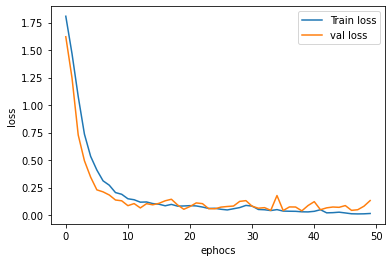

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(ephocs, loss, label = 'Train loss')
plt.plot(ephocs, val_loss, label = 'val loss')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Evaluation and Test the Model

In [28]:
score = model.evaluate(X_train, y_train)
print ("Model evaluation Train accuracy: ", round(score[1]*100),"%")

70/70 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9929
Model evaluation Train accuracy:  99 %


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = model.predict(X_train, batch_size=5)
y_train_pred = (y_train_pred > 0.5)

print(confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1)))

print(classification_report(y_train, y_train_pred))

448/448 [==============================] - 1s 2ms/step
[[320   0   3   0   0   0   0]
 [  1 310   0   0   0   3   4]
 [  0   0 323   0   0   0   0]
 [  0   0   0 324   0   4   1]
 [  0   0   0   0 324   0   0]
 [  2   0   0   0   0 303   0]
 [  0   0   0   0   0   0 318]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       1.00      0.97      0.99       318
           2       0.99      1.00      1.00       323
           3       1.00      0.98      0.99       329
           4       1.00      1.00      1.00       324
           5       0.98      0.99      0.99       305
           6       0.98      1.00      0.99       318

   micro avg       0.99      0.99      0.99      2240
   macro avg       0.99      0.99      0.99      2240
weighted avg       0.99      0.99      0.99      2240
 samples avg       0.99      0.99      0.99      2240



In [30]:
scores=model.evaluate(X_test , y_test)
print ("Model evaluation Test accuracy: ", round(scores[1]*100),"%")

18/18 [==============================] - 0s 4ms/step - loss: 0.1504 - accuracy: 0.9732
Model evaluation Test accuracy:  97 %


In [31]:
y_test_pred = model.predict(X_test, batch_size=5)
y_test_pred = (y_test_pred > 0.5)

print(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

print(classification_report(y_test, y_test_pred))

112/112 [==============================] - 0s 2ms/step
[[72  0  1  2  0  1  1]
 [ 0 78  0  1  0  1  2]
 [ 0  0 77  0  0  0  0]
 [ 0  0  1 67  0  3  0]
 [ 0  0  0  0 76  0  0]
 [ 1  0  0  1  0 93  0]
 [ 0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        77
           1       1.00      0.95      0.97        82
           2       0.97      1.00      0.99        77
           3       0.94      0.94      0.94        71
           4       1.00      1.00      1.00        76
           5       0.95      0.98      0.96        95
           6       0.96      1.00      0.98        82

   micro avg       0.97      0.97      0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560
 samples avg       0.97      0.97      0.97       560



In [32]:
filename = '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_ring_ps.wav'
y, sr = librosa.load(filename, duration = 3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

print('MFCC: ', mfcc)
mfcc = mfcc.reshape(1, -1)
print('mfcc: ',mfcc)
print(mfcc.shape)
predicted_label = model.predict([mfcc])
predicted_label=np.argmax(predicted_label,axis=1)
print('Predicted label: ',predicted_label)
predicted_class = lb.inverse_transform(predicted_label)
print('Predicted classes: ',predicted_class)

MFCC:  [-351.66544     90.79366    -14.765974     3.5714388  -19.367561
   -6.94249     -9.299621   -16.400072   -25.985966    -5.4962425
  -23.94042      9.095266   -13.048985     6.4820046    3.406256
   -2.787601     3.934225    11.32971     -7.448217     4.786689
   -3.9438965    3.5727496   -2.5988603    1.9715701   -4.9265475
    1.9515333   -2.7673984    2.685435     0.501708    11.851411
    6.5268335   10.940344     3.86877      8.212958     6.9915595
    7.432092     8.364695     6.1766996    7.2987037    4.70136  ]
mfcc:  [[-351.66544     90.79366    -14.765974     3.5714388  -19.367561
    -6.94249     -9.299621   -16.400072   -25.985966    -5.4962425
   -23.94042      9.095266   -13.048985     6.4820046    3.406256
    -2.787601     3.934225    11.32971     -7.448217     4.786689
    -3.9438965    3.5727496   -2.5988603    1.9715701   -4.9265475
     1.9515333   -2.7673984    2.685435     0.501708    11.851411
     6.5268335   10.940344     3.86877      8.212958     6.9915

# Save The Model

In [33]:
model.save('emotions_classification.h5')